In [ ]:
def change_brightness(image):
    # Randomly select a percent change
    change_pct = random.uniform(0.4, 1.2)
    
    # Change to HSV to change the brightness V
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = hsv[:,:,2] * change_pct
    
    #Convert back to RGB 
    img_bright = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return img_bright

plt.imshow(change_brightness(image))

In [1]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
from __future__ import division
from keras.layers import Dropout, Lambda, Convolution2D, ELU, Reshape
from keras.regularizers import l2, activity_l2
from keras.layers import Conv2D, Flatten, MaxPooling2D, Activation,AveragePooling2D 
import cropping 
############### data pre-processing #################
df = pd.read_csv('./data/driving_log.csv')
crop = 60
model = Sequential()
model.add(Lambda(lambda x: x/128 - 0.5,input_shape = (160-crop, 320, 3)))
# model.add(cropping.Cropping2D(cropping=((60,0),(0,0)) ))
# keras.layers.pooling.AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='valid', dim_ordering='default')
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(5, 5, 5,W_regularizer=l2(0.000)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(15, 5, 5,W_regularizer=l2(0.000)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(Conv2D(20, 5, 5,W_regularizer=l2(0.000)))
model.add(AveragePooling2D((2,2)))
model.add(Activation('relu'))
model.add(Conv2D(25, 5, 5,W_regularizer=l2(0.000)))
model.add(MaxPooling2D((2,2)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(200, activation='relu',W_regularizer=l2(0.000)))
model.add((Dropout(0.5)))
model.add(Dense(1))

# model.add(Lambda(lambda x: x/128 - 0.5,input_shape = (160, 320, 3)))
# model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal', input_shape = (160, 320, 3)))
# model.add(ELU())
# model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode="valid", init='he_normal'))
# model.add(Flatten())
# model.add(ELU())
# model.add(Dense(1164, init='he_normal'))
# model.add(ELU())
# model.add(Dense(100, init='he_normal'))
# model.add(ELU())
# model.add(Dense(50, init='he_normal'))
# model.add(ELU())
# model.add(Dense(10, init='he_normal'))
# model.add(ELU())
# model.add(Dense(1, init='he_normal'))


model.summary()
batchSize = 100

# model = Sequential()
# model.add(Conv2D(3, 10, 10, input_shape=(160, 320, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(1))
# model.summary()
# model = Model(input=a, output=b)
model.compile(loss='mse', optimizer='adam')
pos = {0:'left',1:'center',2:'right'}
im = plt.imread('./data/'+ str(df.iloc[0]['center']))
start = 0 
end = start + batchSize
df1 = df[df['steering']!=0]
df2 = df[df['steering']==0]
 
def generate_data(df,batchSize,pos,im,start,end,df1,df2):
    while(True):
        indices1 = np.random.choice(len(df1), int(50*batchSize/10))
        indices2 = np.random.choice(len(df2), int(50*batchSize/10))
        df3 = df1.iloc[indices1].append(df2.iloc[indices2])
        xBatch = np.zeros((batchSize, im.shape[0]-crop, im.shape[1], im.shape[2]), dtype=np.float32)
        yBatch = np.zeros((batchSize,), dtype=np.float32)
        for i in range(batchSize):
            view = pos[np.random.choice(3)]
#             print(view)
            if view == 'left':
                yBatch[i] = df3.iloc[i]['steering'] + 0.25                
            if view == 'center':
                yBatch[i] = df3.iloc[i]['steering'] + 0               
            if view == 'right':
                yBatch[i] = df3.iloc[i]['steering'] - 0.25                
                
#             xBatch[i] = (xBatch[i]-128)/128
            xBatch[i] = plt.imread('./data/'+ str(df3.iloc[i][view]))[crop:,:,:]
#             print(xBatch[i].mean(),yBatch[i].mean())
        start = end
        end = end + start 
        if end > len(df3):
            start = 0
            end = start + batchSize
        yield (xBatch,yBatch)

model.fit_generator(generate_data(df,batchSize,pos,im,start,end,df1,df2),
                    samples_per_epoch=(len(df) // batchSize) * batchSize, nb_epoch=15, verbose = 2)

# validation_data=generate_data(pd.read_csv('./data/driving_log.csv'),100),nb_val_samples = 2000

model.save_weights('model.h5')  # always save your weights after training or during training
with open('model.json', 'w') as outfile:
    outfile.write(model.to_json())


Using TensorFlow backend.


ImportError: No module named 'cropping'

In [7]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
from __future__ import division
from keras.layers import Dropout, Lambda, Convolution2D, ELU, Reshape
from keras.regularizers import l2, activity_l2
from keras.layers import Conv2D, Flatten, MaxPooling2D, Activation,AveragePooling2D 

flags = tf.app.flags
FLAGS = flags.FLAGS

# command line flags
flags.DEFINE_string('training_file', '', "Bottleneck features training file (.p)")
flags.DEFINE_integer('epoch', 15, "number of epoches")
flags.DEFINE_integer('batchSize', 100, "batch size")
flags.DEFINE_integer('cropSize', 60, "number of epoches")
flags.DEFINE_integer('steerAdjustment', 0.25, "number of epoches")
flags.DEFINE_integer('oversamplingCoef', 0.8 , "number of epoches")


 
def generate_data(df,batchSize,pos,im,start,end,df1,df0,steerAdjustment,crop,oversamplingCoef):
    while(True):
        indices1 = np.random.choice(len(df1), int(oversamplingCoef*batchSize))
        indices2 = np.random.choice(len(df0), int((1-oversamplingCoef)**batchSize))
        df3 = df1.iloc[indices1].append(df0.iloc[indices2])
        xBatch = np.zeros((batchSize, im.shape[0]-crop, im.shape[1], im.shape[2]), dtype=np.float32)
        yBatch = np.zeros((batchSize,), dtype=np.float32)
        for i in range(batchSize):
            view = pos[np.random.choice(3)]
            if view == 'left':
                yBatch[i] = df3.iloc[i]['steering'] + steerAdjustment                
            if view == 'center':
                yBatch[i] = df3.iloc[i]['steering'] + 0               
            if view == 'right':
                yBatch[i] = df3.iloc[i]['steering'] - steerAdjustment                
            xBatch[i] = plt.imread('./data/'+ str(df3.iloc[i][view]))[crop:,:,:]
        start = end
        end = end + start 
        if end > len(df3):
            start = 0
            end = start + batchSize
        yield (xBatch,yBatch)


def main(_):
    df = pd.read_csv('FLAGS.training_file')
    batchSize = FLAGS.batchSize
    model.compile(loss='mse', optimizer='adam')
    pos = {0:'left',1:'center',2:'right'}
    im = plt.imread('./data/'+ str(df.iloc[0]['center']))
    start = 0 
    end = start + batchSize
    df1 = df[df['steering']!=0]
    df0 = df[df['steering']==0]
    crop = FLAGS.cropSize
    model = Sequential()
    
    model.add(Lambda(lambda x: x/128 - 0.5,
                     input_shape = (im.shape[0]-crop, im.shape[1], im.shape[2])))
    model.add(AveragePooling2D((2,2)))
    model.add(Conv2D(5, 5, 5,W_regularizer=l2(0.000)))
    model.add((Dropout(0.5)))
    model.add(Activation('relu'))
    model.add(AveragePooling2D((2,2)))
    model.add(Conv2D(15, 5, 5,W_regularizer=l2(0.000)))
    model.add((Dropout(0.5)))
    model.add(Activation('relu'))
    model.add(Conv2D(20, 5, 5,W_regularizer=l2(0.000)))
    model.add(AveragePooling2D((2,2)))
    model.add(Activation('relu'))
    model.add(Conv2D(25, 5, 5,W_regularizer=l2(0.000)))
    model.add(MaxPooling2D((2,2)))
    model.add((Dropout(0.5)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(200, activation='relu',W_regularizer=l2(0.000)))
    model.add((Dropout(0.5)))
    model.add(Dense(1))
    model.summary()


    model.fit_generator(generate_data(df,
                                      batchSize,
                                      pos,
                                      im,
                                      start,
                                      end,
                                      df1,
                                      df0,
                                      FLAGS.steerAdjustment,
                                      crop,
                                      FLAGS.oversamplingCoef),
                    samples_per_epoch=(len(df) // batchSize) * batchSize, nb_epoch=1, verbose = 2)

    model.save_weights('model.h5')  # always save your weights after training or during training
    with open('model.json', 'w') as outfile:
        outfile.write(model.to_json())

if __name__ == '__main__':
    tf.app.run()


array([[[ 25,  33,  36],
        [  0,   7,  10],
        [ 20,  28,  31],
        ..., 
        [104, 113, 118],
        [ 91, 100, 105],
        [ 76,  85,  90]],

       [[  5,  15,  17],
        [  0,   2,   7],
        [ 12,  21,  26],
        ..., 
        [117, 122,  99],
        [107, 112,  89],
        [ 96, 102,  76]],

       [[  4,  12,  15],
        [  6,  15,  20],
        [  0,   2,   9],
        ..., 
        [179, 187, 104],
        [174, 182,  97],
        [174, 180,  94]],

       ..., 
       [[197, 174, 156],
        [208, 185, 167],
        [216, 193, 175],
        ..., 
        [155, 140, 121],
        [161, 146, 127],
        [166, 151, 132]],

       [[208, 185, 167],
        [201, 178, 160],
        [185, 164, 147],
        ..., 
        [161, 146, 127],
        [157, 142, 123],
        [155, 140, 121]],

       [[179, 156, 140],
        [160, 137, 121],
        [137, 116,  99],
        ..., 
        [181, 166, 147],
        [174, 159, 140],
        [165, 150,

In [5]:
im[50:,:,:].shape

(110, 320, 3)

In [ ]:
df.iloc[0]

In [ ]:
df1 = df[df['steering']!=0]
df2 = df[df['steering']==0]
# indices1 = np.random.choice(len(df1), int(batchSize/2))
# indices2 = np.random.choice(len(df2), int(batchSize/2))
# df1.append(df2[indices2])

In [ ]:
df = pd.read_csv('./data/driving_log.csv')
A = plt.imread('./data/'+ str(df.iloc[0]['center']))

In [ ]:
len(df1)/len(df2)

In [ ]:
A.shape

In [ ]:
% matplotlib inline
plt.imshow(A)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

a = Input(shape=(160, 320, 3,))
b = Dense(32)(a)
model = Model(input=a, output=b)

In [ ]:
model.compile(self, optimizer, loss, metrics=None, loss_weights=None, sample_weight_mode=None)

In [ ]:
model.fit(self, x, y, batch_size=32, nb_epoch=10, verbose=1, callbacks=None,
          validation_split=0.0, validation_data=None, shuffle=True,
          class_weight=None, sample_weight=None, initial_epoch=0)

In [ ]:
fit_generator(self, generator, samples_per_epoch, nb_epoch,
              verbose=1, callbacks=None, validation_data=None,
              nb_val_samples=None, class_weight=None, max_q_size=10,
              nb_worker=1, pickle_safe=False, initial_epoch=0)

In [ ]:
df = pd.read_csv('./data/driving_log.csv')

In [ ]:
df.iloc[0]

In [ ]:
pwd

In [ ]:
'./data/'+ str(df.iloc[start:end]['center'])

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Conv2D, Flatten
from keras.models import Sequential

############### data pre-processing #################




def generate_data(df,batchSize = 100):
    im = plt.imread('./data/'+ str(df.iloc[0]['center']))
    start = 0 
    end = start + batchSize
    while(True):
        xBatch = np.zeros((batchSize, im.shape[0], im.shape[1], im.shape[2]), dtype=np.float32)
        yBatch = np.zeros((batchSize,), dtype=np.float32)
        for i in range(start,end):
            xBatch[i] = plt.imread('./data/'+ str(df.iloc[i]['center']))
            yBatch[i] = df.iloc[i]['steering']
        if end > len(df):
            start = 0
            end = start + batchSize
        start = end
        end = end + start 
        yield (xBatch,yBatch)
        
A = generate_data(pd.read_csv('./data/driving_log.csv'),100)
next(A)

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
from __future__ import division
############### data pre-processing #################



# model = Model(input=a, output=b)
model.compile(loss='mean_squared_error', optimizer='adam')
def generate_data(df,batchSize):
    im = plt.imread('./data/'+ str(df.iloc[0]['center']))
    start = 0 
    end = start + batchSize
    while(True):
        xBatch = np.zeros((batchSize, im.shape[0], im.shape[1], im.shape[2]), dtype=np.float32)
        yBatch = np.zeros((batchSize,), dtype=np.float32)
        for i in range(batchSize):
            xBatch[i] = plt.imread('./data/'+ str(df.iloc[start+i]['center']))
            xBatch[i] = (xBatch[i]-128)/128
            yBatch[i] = df.iloc[start+i]['steering']
        start = end
        end = end + start 
        if end > len(df):
            start = 0
            end = start + batchSize
        yield (xBatch,yBatch)
        
A = generate_data(pd.read_csv('./data/driving_log.csv'),50)


In [6]:
import os
os.chdir('/media/pemfir/Data/docker/behavioralCloning')

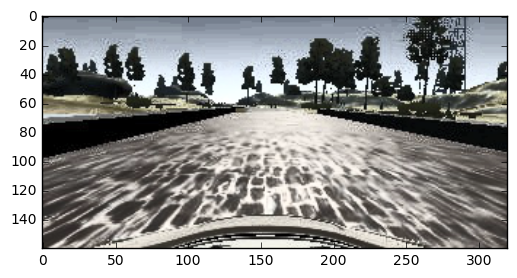

In [12]:
import cv2
import numpy as np

# img = cv2.imread('input.jpg')

img_yuv = cv2.cvtColor(change_brightness(im), cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(im)
plt.imshow(img_output)

plt.show()

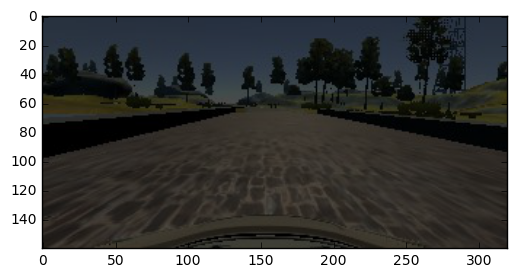

In [11]:
import random 
import cv2
def change_brightness(image):
    # Randomly select a percent change
    change_pct = random.uniform(0.4, 1.2)
    
    # Change to HSV to change the brightness V
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = hsv[:,:,2] * 0.3
    
    #Convert back to RGB 
    img_bright = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return img_bright
%matplotlib inline 
plt.imshow(change_brightness(im))
plt.show()

In [7]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
from __future__ import division
from keras.layers import Dropout, Lambda, Convolution2D, ELU, Reshape
from keras.regularizers import l2, activity_l2
from keras.layers import Conv2D, Flatten, MaxPooling2D, Activation,AveragePooling2D 
# import cropping 
############### data pre-processing #################
df = pd.read_csv('./data/driving_log.csv')

model = Sequential()
model.add(Lambda(lambda x: x/128 - 0.5,input_shape = (160, 320, 3)))
# model.add(cropping.Cropping2D(cropping=((60,0),(0,0)) ))
# keras.layers.pooling.AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='valid', dim_ordering='default')
# model.add(AveragePooling2D((4,6)))
model.add(Conv2D(4, 5, 5,W_regularizer=l2(0.000)))
model.add(AveragePooling2D((3,3)))
# model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(Conv2D(8, 5, 5,W_regularizer=l2(0.000)))
# # model.add((Dropout(0.5)))
model.add(Activation('relu'))
# model.add(Conv2D(12, 5, 5,W_regularizer=l2(0.000)))
model.add(AveragePooling2D((3,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(16, 5, 5,W_regularizer=l2(0.000)))
# model.add(MaxPooling2D((2,4)))
# # model.add((Dropout(0.5)))
# model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(48, activation='relu',W_regularizer=l2(0.000)))
# model.add((Dropout(0.5)))
model.add(Dense(1))

# model.add(Lambda(lambda x: x/128 - 0.5,input_shape = (160, 320, 3)))
# model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal', input_shape = (160, 320, 3)))
# model.add(ELU())
# model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode="valid", init='he_normal'))
# model.add(Flatten())
# model.add(ELU())
# model.add(Dense(1164, init='he_normal'))
# model.add(ELU())
# model.add(Dense(100, init='he_normal'))
# model.add(ELU())
# model.add(Dense(50, init='he_normal'))
# model.add(ELU())
# model.add(Dense(10, init='he_normal'))
# model.add(ELU())
# model.add(Dense(1, init='he_normal'))


model.summary()
batchSize = 50

# model = Sequential()
# model.add(Conv2D(3, 10, 10, input_shape=(160, 320, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(1))
# model.summary()
# model = Model(input=a, output=b)
model.compile(loss='mse', optimizer='adam')
pos = {0:'left',1:'center',2:'right'}
im = plt.imread('./data/'+ str(df.iloc[0]['center']))
start = 0 
end = start + batchSize
df1 = df[df['steering']!=0]
df2 = df[df['steering']==0]

def generate_data(df,batchSize,pos,im,start,end,df1,df2):
    while(True):
        indices1 = np.random.choice(len(df1), int(3*batchSize/10))
        indices2 = np.random.choice(len(df2), int(7*batchSize/10))
        df3 = df1.iloc[indices1].append(df2.iloc[indices2])
        xBatch = np.zeros((batchSize, im.shape[0], im.shape[1], im.shape[2]), dtype=np.float32)
        yBatch = np.zeros((batchSize,), dtype=np.float32)
        for i in range(batchSize):
            view = pos[np.random.choice(3)]
#             print(view)
            if view == 'left':
                yBatch[i] = df3.iloc[i]['steering'] + 0.2                
                xBatch[i] = plt.imread('./data/'+ str(df3.iloc[i][view]))
            if view == 'center':
                yBatch[i] = df3.iloc[i]['steering'] + 0               
                xBatch[i] = plt.imread('./data/'+ str(df3.iloc[i][view]))
            if view == 'right':
                yBatch[i] = df3.iloc[i]['steering'] - 0.2                
                xBatch[i] = plt.imread('./data/'+ str(df3.iloc[i][view]))
#             xBatch[i] = (xBatch[i]-128)/128

#             print(xBatch[i].mean(),yBatch[i].mean())
        start = end
        end = end + start 
        if end > len(df3):
            start = 0
            end = start + batchSize
        yield (xBatch,yBatch)

model.fit_generator(generate_data(df,batchSize,pos,im,start,end,df1,df2),
                    samples_per_epoch=(len(df) // batchSize) * batchSize, nb_epoch=10, verbose = 2)

# validation_data=generate_data(pd.read_csv('./data/driving_log.csv'),100),nb_val_samples = 2000

model.save_weights('model.h5')  # always save your weights after training or during training
with open('model.json', 'w') as outfile:
    outfile.write(model.to_json())


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 160, 320, 3)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 156, 316, 4)   304         lambda_1[0][0]                   
____________________________________________________________________________________________________
averagepooling2d_1 (AveragePooli (None, 52, 105, 4)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 52, 105, 4)    0           averagepooling2d_1[0][0]         
___________________________________________________________________________________________

KeyboardInterrupt: 

In [ ]:
pos = {0:'left',1:'center',2:'right'}
im = plt.imread('./data/'+ str(df.iloc[0]['center']))
start = 0 
end = start + batchSize
df1 = df[df['steering']!=0]
df2 = df[df['steering']==0]
while(True):
    indices1 = np.random.choice(len(df1), int(3*batchSize/10))
    indices2 = np.random.choice(len(df2), int(7*batchSize/10))
    df3 = df1.iloc[indices1].append(df2.iloc[indices2])
    xBatch = np.zeros((batchSize, im.shape[0], im.shape[1], im.shape[2]), dtype=np.float32)
    yBatch = np.zeros((batchSize,), dtype=np.float32)
    for i in range(batchSize):
        view = pos[np.random.choice(3)]
        print(view)
        if view == 'left':
            yBatch[i] = df3.iloc[i]['steering'] + 0.1                
            xBatch[i] = plt.imread('./data/'+ str(df3.iloc[i][view]))
        if view == 'center':
            yBatch[i] = df3.iloc[i]['steering'] + 0               
            xBatch[i] = plt.imread('./data/'+ str(df3.iloc[i][view]))
        if view == 'right':
            yBatch[i] = df3.iloc[i]['steering'] - 0.1                
            xBatch[i] = plt.imread('./data/'+ str(df3.iloc[i][view]))

In [ ]:
'./data/'+ str(df.iloc[i]['right'])

In [ ]:
plt.imread('./data/'+ str(df3.iloc[i]['center']))

In [ ]:
df

In [ ]:
plt.imread('./data/'+ str(df3.iloc[i][view]))

In [ ]:
pos = {0:'left',1:'center',2:'right'}

In [ ]:
for i in range(10):
    print(pos[np.random.choice(3)])

In [ ]:
np.random.choice(2)

In [ ]:
batchSize = 100
import numpy as np
df1 = df[df['steering']!=0]
df2 = df[df['steering']==0]

indices1 = np.random.choice(len(df1), int(batchSize/2))
indices2 = np.random.choice(len(df2), int(batchSize/2))
df3 = df1.iloc[indices1].append(df2.iloc[indices2])

In [ ]:
import numpy as np
np.arange(0,len(pd.read_csv('./data/driving_log.csv')),1000)

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
from __future__ import division
from keras.layers import Dropout, Lambda, Convolution2D, ELU, Reshape
from keras.regularizers import l2, activity_l2
from keras.layers import Conv2D, Flatten, MaxPooling2D, Activation,AveragePooling2D 
############### data pre-processing #################
df = pd.read_csv('./data/driving_log.csv')
batchSize = 50
model = Sequential()
model.add(Lambda(lambda x: x/128 - 0.5,input_shape = (160, 320, 3)))
# keras.layers.pooling.AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='valid', dim_ordering='default')
model.add(AveragePooling2D((4,6)))
model.add(Conv2D(4, 5, 5,W_regularizer=l2(0.000)))
model.add(MaxPooling2D((3,3)))
# model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(Conv2D(8, 5, 5,W_regularizer=l2(0.000)))
# # model.add((Dropout(0.5)))
model.add(Activation('relu'))
# model.add(Conv2D(12, 5, 5,W_regularizer=l2(0.000)))
model.add(MaxPooling2D((3,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(16, 5, 5,W_regularizer=l2(0.000)))
# model.add(MaxPooling2D((2,4)))
# # model.add((Dropout(0.5)))
# model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(48, activation='relu',W_regularizer=l2(0.000)))
# model.add((Dropout(0.5)))
model.add(Dense(1))

# model.add(Lambda(lambda x: x/128 - 0.5,input_shape = (160, 320, 3)))
# model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal', input_shape = (160, 320, 3)))
# model.add(ELU())
# model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode="valid", init='he_normal'))
# model.add(Flatten())
# model.add(ELU())
# model.add(Dense(1164, init='he_normal'))
# model.add(ELU())
# model.add(Dense(100, init='he_normal'))
# model.add(ELU())
# model.add(Dense(50, init='he_normal'))
# model.add(ELU())
# model.add(Dense(10, init='he_normal'))
# model.add(ELU())
# model.add(Dense(1, init='he_normal'))


model.summary()


# model = Sequential()
# model.add(Conv2D(3, 10, 10, input_shape=(160, 320, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(1))
# model.summary()
# model = Model(input=a, output=b)
model.compile(loss='mse', optimizer='adam')
def generate_data(df,batchSize = batchSize):
    im = plt.imread('./data/'+ str(df.iloc[0]['center']))
    start = 0 
    end = start + batchSize
    df1 = df[df['steering']!=0]
    df2 = df[df['steering']==0]
    while(True):
        indices1 = np.random.choice(len(df1), int(3*batchSize/10))
        indices2 = np.random.choice(len(df2), int(7*batchSize/10))
        df3 = df1.iloc[indices1].append(df2.iloc[indices2])
        xBatch = np.zeros((batchSize, im.shape[0], im.shape[1], im.shape[2]), dtype=np.float32)
        yBatch = np.zeros((batchSize,), dtype=np.float32)
        for i in range(batchSize):
            xBatch[i] = plt.imread('./data/'+ str(df3.iloc[i]['center']))
#             xBatch[i] = (xBatch[i]-128)/128
            yBatch[i] = df3.iloc[i]['steering']
#             print(xBatch[i].mean(),yBatch[i].mean())
        start = end
        end = end + start 
        if end > len(df3):
            start = 0
            end = start + batchSize
        yield (xBatch,yBatch)

model.fit_generator(generate_data(df,200),
                    samples_per_epoch=(len(df) // batchSize) * batchSize, nb_epoch=20, verbose = 2)

# validation_data=generate_data(pd.read_csv('./data/driving_log.csv'),100),nb_val_samples = 2000

model.save_weights('model.h5')  # always save your weights after training or during training
with open('model.json', 'w') as outfile:
    outfile.write(model.to_json())

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
from __future__ import division
from keras.layers import Dropout, Lambda, Convolution2D, ELU, Reshape
from keras.regularizers import l2, activity_l2
from keras.layers import Conv2D, Flatten, MaxPooling2D, Activation,AveragePooling2D 
############### data pre-processing #################
df = pd.read_csv('./data/driving_log.csv')
batchSize = 50
model = Sequential()
model.add(Lambda(lambda x: x/128 - 0.5,input_shape = (160, 320, 3)))
# keras.layers.pooling.AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='valid', dim_ordering='default')
model.add(AveragePooling2D((4,6)))
model.add(Conv2D(4, 5, 5,W_regularizer=l2(0.000)))
model.add(MaxPooling2D((3,3)))
# model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(Conv2D(8, 5, 5,W_regularizer=l2(0.000)))
# # model.add((Dropout(0.5)))
model.add(Activation('relu'))
# model.add(Conv2D(12, 5, 5,W_regularizer=l2(0.000)))
model.add(MaxPooling2D((3,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(16, 5, 5,W_regularizer=l2(0.000)))
# model.add(MaxPooling2D((2,4)))
# # model.add((Dropout(0.5)))
# model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(48, activation='relu',W_regularizer=l2(0.000)))
# model.add((Dropout(0.5)))
model.add(Dense(1))

# model.add(Lambda(lambda x: x/128 - 0.5,input_shape = (160, 320, 3)))
# model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal', input_shape = (160, 320, 3)))
# model.add(ELU())
# model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode="valid", init='he_normal'))
# model.add(ELU())
# model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode="valid", init='he_normal'))
# model.add(Flatten())
# model.add(ELU())
# model.add(Dense(1164, init='he_normal'))
# model.add(ELU())
# model.add(Dense(100, init='he_normal'))
# model.add(ELU())
# model.add(Dense(50, init='he_normal'))
# model.add(ELU())
# model.add(Dense(10, init='he_normal'))
# model.add(ELU())
# model.add(Dense(1, init='he_normal'))


model.summary()


# model = Sequential()
# model.add(Conv2D(3, 10, 10, input_shape=(160, 320, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(1))
# model.summary()
# model = Model(input=a, output=b)
model.compile(loss='mse', optimizer='adam')
def generate_data(df,batchSize = batchSize):
    pos = {1:'left',2:'center',3:'right'}
    im = plt.imread('./data/'+ str(df.iloc[0]['center']))
    start = 0 
    end = start + batchSize
    df1 = df[df['steering']!=0]
    df2 = df[df['steering']==0]
    while(True):
        indices1 = np.random.choice(len(df1), int(3*batchSize/10))
        indices2 = np.random.choice(len(df2), int(7*batchSize/10))
        df3 = df1.iloc[indices1].append(df2.iloc[indices2])
        xBatch = np.zeros((batchSize, im.shape[0], im.shape[1], im.shape[2]), dtype=np.float32)
        yBatch = np.zeros((batchSize,), dtype=np.float32)
        for i in range(batchSize):
            xBatch[i] = plt.imread('./data/'+ str(df3.iloc[i]['center']))
#             xBatch[i] = (xBatch[i]-128)/128
            yBatch[i] = df3.iloc[i]['steering']
#             print(xBatch[i].mean(),yBatch[i].mean())
        start = end
        end = end + start 
        if end > len(df3):
            start = 0
            end = start + batchSize
        yield (xBatch,yBatch)

model.fit_generator(generate_data(df,200),
                    samples_per_epoch=(len(df) // batchSize) * batchSize, nb_epoch=20, verbose = 2)

# validation_data=generate_data(pd.read_csv('./data/driving_log.csv'),100),nb_val_samples = 2000

model.save_weights('model.h5')  # always save your weights after training or during training
with open('model.json', 'w') as outfile:
    outfile.write(model.to_json())

In [ ]:
np.random.choice(2, 1)

In [ ]:
model.predict_generator(generate_data(pd.read_csv('./data/driving_log.csv'),10),200)

In [ ]:
model.save_weights('model.h5')  # always save your weights after training or during training
with open('model.json', 'w') as outfile:
    outfile.write(model.to_json())

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
def generate_data(df):
    while(True):
        for line in range(len(df)):
            # create numpy arrays of input data
            # and labels, from each line in the file
            im = plt.imread('./data/'+ str(df.iloc[line]['center']))
            im = im.reshape(1, im.shape[0], im.shape[1], im.shape[2])
            steer = df.iloc[line]['steering']
            steer = steer.reshape(1)
            yield (im,steer)
A = generate_data(pd.read_csv('./data/driving_log.csv'))

counter = 0 
for i in range(100):
    print(next(A)[1])
#     break

In [ ]:
next(A)

In [ ]:
next(A)

In [ ]:
next(A)

In [ ]:
L = [1,2,3,4,5]
def generate_data(L):
    for i in L:
        yield i
        
for i in generate_data(L):
    print(i)

A = generate_data(L) 
next(A)

In [ ]:
import pandas as pd
df = pd.read_csv('./data/driving_log.csv')
for i in range(len(df)):
    if i < 100:
        print(i,df.iloc[i])

In [ ]:
model.predict_generator(generate_data(pd.read_csv('./data/driving_log.csv')),20)

In [ ]:
next(A)

In [ ]:
model.evaluate_generator(generate_arrays_from_file('./data/driving_log.csv'),100)

In [ ]:
def generate_arrays_from_file(path):
    while 1:
    f = open(path)
    for line in f:
        # create numpy arrays of input data
        # and labels, from each line in the file
        x1, x2, y = process_line(line)
        yield ({'input_1': x1, 'input_2': x2}, {'output': y})
    f.close()

model.fit_generator(generate_arrays_from_file('/my_file.txt'),
        samples_per_epoch=10000, nb_epoch=10)

In [ ]:
evaluate_generator(self, generator, val_samples, max_q_size=10, nb_worker=1, pickle_safe=False)

In [ ]:
len(df)